# Background
idea: do a synthesizer project, basic elements include pitch, volume, selection of 3 different waveforms, and maybe some effects. Prototyping is to be completed in python. Implementation can also be done in python, but c++ would be pretty cool!

    1) pitch: allow for user input in some manner, slider or whatever
    2) waveforms: sine, sawtooth, triangle
    3) possible effects: decay, reverb
    4) Easy GUI

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [2]:
Fs = 44100 #sampling rate, only affects the tone at the output (Ipython Display)

# Traditional Karplus-Strong Algorithm (Noise Input)

In [3]:
#the karplus strong algorithm (just a looper that makes our original sequence longer)
def KS_1(x, N):
    # given the initial buffer x, produce a N-sample output
    #  by concatenating identical copies of the buffer
    y = x
    while len(y) < N:
        # keep appending until we reach or exceed the required length
        y = np.append(y, x)
    # trim the excess
    y = y[0:N+1]
    return y

<StemContainer object of 3 artists>

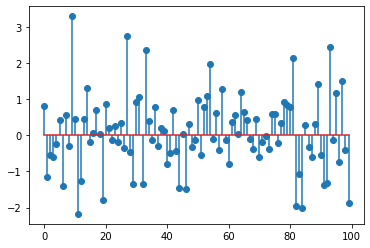

In [4]:
#length of the sequence influences the pitch of the note, the shorter the sequence, the higher the pitch and vice-versa
b = np.random.randn(100)
plt.stem(b)

132300


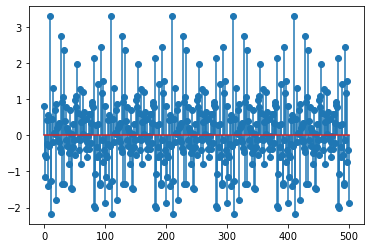

In [5]:
y = KS_1(b, Fs*3)

# we can look at a few periods:
plt.stem(y[0:500])
print(len(y))

In [7]:
print(type(y))
IPython.display.Audio(y, rate=Fs)

<class 'numpy.ndarray'>


# Sinewave Generation

0.04 *Fs
1764.0 Hz


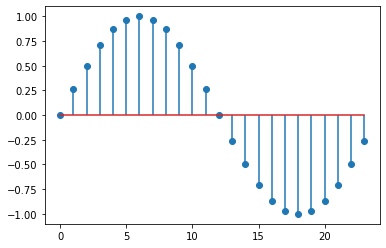

In [100]:
#length of the sequence influences the pitch of the note, the shorter the sequence, the higher the pitch and vice-versa
num = 25
n = np.linspace(0,num,num = num)
b = np.sin(2*np.pi*n)
b = b[:-1]
plt.stem(b)
print(str(1/num)+ " *Fs")
print(str(Fs/num)+" Hz")

#if we set the number of samples equal to the length of n, by the nature of using linspace we end up with 1 period of sine
#therefore, 1 period is equal to n samples, this means that the percieved frequency is equal to 1/n samples * Fs

44101


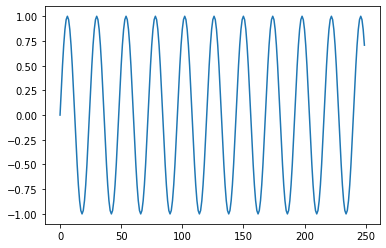

In [101]:
y = KS_1(b, Fs)

# we can look at a few periods:
plt.plot(y[0:250])
print(len(y))

In [102]:
IPython.display.Audio(y, rate=Fs)

# Sinewave FFT

In [127]:
print(len(y))
def fft(data, Fs):
    freq = np.fft.fft(data)
    n = len(freq)
    half = int(n/2)
    print(half)
    freqs = np.fft.fftfreq(n, d=1/Fs)
    
    freq = freq[:half]
    freqs = freqs[:half]
    
    freq = freq[:5000]
    freqs = freqs[:5000]
    
    plt.plot(freqs, abs(freq))

44101


22050


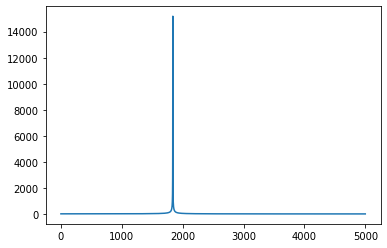

In [128]:
fft(y, Fs)

# Sinewave with np.tile()

In [71]:
import pyaudio
from scipy.io.wavfile import write

0.01 *Fs
441.0 Hz
218790


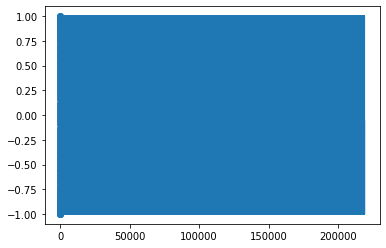

In [74]:
#using np.tile
num = 100
n = np.linspace(0,num,num = num)
b = np.sin(2*np.pi*n)
b = b[:-1]
plt.stem(b)
print(str(1/num)+ " *Fs")
print(str(Fs/num)+" Hz")
repeat = int(1 + Fs/num)*5
c = np.tile(b,repeat)
plt.plot(c)
print(len(c))

In [82]:
import pyaudio
import numpy as np

p = pyaudio.PyAudio()

volume = 0.5     # range [0.0, 1.0]
fs = 44100       # sampling rate, Hz, must be integer
duration = 30.0   # in seconds, may be float
f = 440.0        # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
samples = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)

# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(volume*samples)

stream.stop_stream()
stream.close()

p.terminate()

In [83]:
#test audio with wav
p = pyaudio.PyAudio()

volume = 1
sample_rate = 44100

#samples = #c.astype(np.float32)

write('test.wav', sample_rate, samples)

In [66]:
IPython.display.Audio(c, rate=Fs)

# Sawtooth Generation

In [ ]:
#length of the sequence influences the pitch of the note, the shorter the sequence, the higher the pitch and vice-versa
num = 200
n = np.linspace(0,num,num = num)
b = n
b = b[:-1]
plt.stem(b)
print(str(1/num)+ " *Fs")
print(str(Fs/num)+" Hz")

In [ ]:
y = KS_1(b, Fs)

# we can look at a few periods:
plt.plot(y[0:250])
print(len(y))

In [ ]:
IPython.display.Audio(y, rate=Fs)

# Triangle Generation

In [ ]:
#length of the sequence influences the pitch of the note, the shorter the sequence, the higher the pitch and vice-versa
num = 51
numHalf = round(num/2)

n1 = np.linspace(0,numHalf,num = numHalf)
n2 = np.linspace(numHalf,2*numHalf,num = numHalf)
n2 = n2[::-1]
n2 = n2-numHalf
n = np.concatenate((n1, n2), axis=0)

b = n
b = b[:-1]
plt.stem(b)
print(str(1/num)+ " *Fs")
print(str(Fs/num)+" Hz")

In [ ]:
y = KS_1(b, Fs)

# we can look at a few periods:
plt.plot(y[0:250])
print(len(y))

In [ ]:
IPython.display.Audio(y, rate=Fs)

# Modified Karplus-Strong (allow alpha)

In [ ]:
def KS(x, N, alpha = 0.99):
    # we will adjust alpha so that all notes have a decay
    #  comparable to that of a buf len of 50 samples
    REF_LEN = 50
    M = len(x)
    a = alpha ** (float(M) / REF_LEN)
    y = np.zeros(N)
    # 
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + a * (y[n-M] if n-M >= 0 else 0)
    return y

In [ ]:
y = KS(b, Fs)

# we can look at a few periods:
plt.plot(y[0:250])
print(len(y))

In [ ]:
IPython.display.Audio(y, rate=Fs)